In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================================
# ЗАГРУЗКА ДАННЫХ
# ============================================================================
# Загружаем две базы данных:
# 1. bdcurves.txt - результаты тестирования алгоритма Бурместера-Десмедта (BD)
# 2. curves4.txt - результаты тестирования алгоритма на эллиптических кривых (ECDH)

bd = pd.DataFrame(pd.read_csv("bdcurves.txt"))
# Данные из bdcurves.txt содержат результаты тестирования классического алгоритма обмена ключами
# на основе задачи дискретного логарифма (Бурместер-Десмедт):
#   - p: простое число (размер поля GF(p))
#   - g: генератор мультипликативной группы
#   - время_генерации_ключа_мкс: время генерации сеансового ключа в микросекундах
#   - размер_ключа: размер ключа в битах
#   - общее_время_мс: общее время выполнения протокола в миллисекундах

ecdh = pd.DataFrame(pd.read_csv("curves4.txt"))
# Данные из curves4.txt содержат результаты тестирования алгоритма ECDH (Elliptic Curve Diffie-Hellman):
#   - a, b, p: параметры эллиптической кривой (y² = x³ + ax + b mod p)
#   - время_генерации_общего_ключа_последовательным_умножением_мкс: время метода 1
#   - время_генерации_общего_ключа_кольцевым_методом_мкс: время метода 2
#   - x_координата_общего_ключа, y_координата_общего_ключа: координаты общего секрета
#   - размер_ключа: размер ключа в битах
#   - порядок_генератора: порядок точки генератора
#   - общее_время_мс: общее время в миллисекундах

print("=" * 70)
print("ДАННЫЕ ИЗ БАЗЫ BD (Бурместер-Десмедт)")
print("=" * 70)
print(bd.head())
print(f"\nВсего записей в bd: {len(bd)}")
print(f"Столбцы: {bd.columns.tolist()}")

print("\n" + "=" * 70)
print("ДАННЫЕ ИЗ БАЗЫ ECDH (Эллиптические кривые)")
print("=" * 70)
print(ecdh.head())
print(f"\nВсего записей в ecdh: {len(ecdh)}")
print(f"Столбцы: {ecdh.columns.tolist()}")

ДАННЫЕ ИЗ БАЗЫ BD (Бурместер-Десмедт)
      p     g  время_генерации_ключа_мкс  размер_ключа  общий_ключ  \
0  2617  2612                         98            11        1681   
1  2269  2267                         96            11        1456   
2  2083  2079                        101            11        1150   
3  2593  2586                         58            12        2152   
4  2887  2885                         62            10         698   

   общее_время_мс  
0             100  
1              98  
2             104  
3              60  
4              64  

Всего записей в bd: 200
Столбцы: ['p', 'g', 'время_генерации_ключа_мкс', 'размер_ключа', 'общий_ключ', 'общее_время_мс']

ДАННЫЕ ИЗ БАЗЫ ECDH (Эллиптические кривые)
      a     b     p  \
0   494  2340  2617   
1   801  1691  2269   
2   751  1025  2083   
3   646  2138  2593   
4  2430  2668  2887   

   время_генерации_общего_ключа_последовательным_умножением_мкс  \
0                                               1

In [2]:
# ============================================================================
# ПРОСМОТР ПЕРВОЙ ТАБЛИЦЫ (БУРМЕСТЕР-ДЕСМЕДТ)
# ============================================================================
# Эта ячейка выводит содержимое полной таблицы bd для визуального осмотра.
# Алгоритм Бурместера-Десмедта - классический протокол распределения ключей,
# основанный на проблеме дискретного логарифма в мультипликативной группе Z*p.
print("Полные данные из bdcurves.txt (Бурместер-Десмедт):")
bd

Полные данные из bdcurves.txt (Бурместер-Десмедт):


,p,g,время_генерации_ключа_мкс,размер_ключа,общий_ключ,общее_время_мс
0,2617,2612,98,11,1681,100
1,2269,2267,96,11,1456,98
2,2083,2079,101,11,1150,104
3,2593,2586,58,12,2152,60
4,2887,2885,62,10,698,64
...,...,...,...,...,...,...
195,2621,2619,107,7,96,108
196,3169,3162,82,12,2434,84
197,3343,3332,129,12,2738,132
198,2521,2504,87,11,1417,89


In [3]:
# Основные статистические характеристики алгоритма Бурместера-Десмедта:
# Среднее время, стандартное отклонение, минимум, максимум
print(f"\nОсновные статистики для Бурместера-Десмедта:")
bd.describe()


Основные статистики для Бурместера-Десмедта:


,p,g,время_генерации_ключа_мкс,размер_ключа,общий_ключ,общее_время_мс
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2987.500000,2983.470000,72.490000,10.580000,1458.370000,74.430000
std,574.534174,574.611146,16.954562,1.551009,874.325735,17.074331
min,2081.000000,2078.000000,52.000000,1.000000,1.000000,54.000000
25%,2503.000000,2501.000000,63.000000,10.000000,723.500000,65.000000
50%,2909.000000,2907.000000,66.000000,11.000000,1413.500000,68.000000
75%,3499.000000,3495.000000,76.250000,12.000000,2129.750000,78.250000
max,4091.000000,4088.000000,142.000000,12.000000,3592.000000,145.000000


In [4]:
# ============================================================================
# ПРОСМОТР ВТОРОЙ ТАБЛИЦЫ (ECDH)
# ============================================================================
# Эта ячейка выводит полное содержимое таблицы ecdh для визуального осмотра.
# ECDH (Elliptic Curve Diffie-Hellman) использует точки на эллиптической кривой
# вместо чисел в конечном поле, что обеспечивает более высокую безопасность при
# меньшем размере ключа и часто - лучшую производительность.
print("Полные данные из curves4.txt (ECDH - Эллиптические кривые):")
ecdh

Полные данные из curves4.txt (ECDH - Эллиптические кривые):


,a,b,p,время_генерации_общего_ключа_последовательным_умножением_мкс,время_генерации_общего_ключа_кольцевым_методом_мкс,x_координата_общего_ключа,y_координата_общего_ключа,размер_ключа,порядок_генератора,общее_время_мс
0,494,2340,2617,1532,62,1295,2081,23,2659,262
1,801,1691,2269,1073,177,1896,626,21,2251,237
2,751,1025,2083,3343,181,299,1801,20,2113,203
3,646,2138,2593,1265,116,1556,1793,22,2647,309
4,2430,2668,2887,1099,110,2286,2612,24,2879,326
...,...,...,...,...,...,...,...,...,...,...
195,1901,231,2621,1900,257,2265,1946,23,2617,320
196,1306,82,3169,1317,152,2199,800,22,3137,478
197,2301,194,3343,975,163,1371,386,20,3407,540
198,481,1700,2521,1266,232,417,873,19,2549,270


In [5]:
print(f"\nОсновные статистики для ECDH (Эллиптические кривые):")
ecdh.describe()


Основные статистики для ECDH (Эллиптические кривые):


,a,b,p,время_генерации_общего_ключа_последовательным_умножением_мкс,время_генерации_общего_ключа_кольцевым_методом_мкс,x_координата_общего_ключа,y_координата_общего_ключа,размер_ключа,порядок_генератора,общее_время_мс
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1459.105000,1483.780000,2987.500000,1192.735000,159.885000,1444.060000,1442.555000,21.025000,2987.440000,355.640000
std,881.194931,929.511868,574.534174,435.905417,54.106741,903.605295,951.833289,2.260514,573.866728,136.260762
min,36.000000,3.000000,2081.000000,735.000000,30.000000,29.000000,12.000000,12.000000,1997.000000,156.000000
25%,770.500000,678.250000,2503.000000,946.000000,129.750000,710.750000,681.250000,20.000000,2473.000000,242.500000
50%,1392.000000,1592.500000,2909.000000,1059.000000,150.000000,1320.500000,1359.500000,22.000000,2953.000000,329.500000
75%,2032.250000,2165.750000,3499.000000,1252.500000,176.000000,2129.000000,2125.000000,23.000000,3499.000000,454.000000
max,3661.000000,3538.000000,4091.000000,4508.000000,399.000000,3840.000000,3755.000000,24.000000,4139.000000,1178.000000


C:\Users\geezix\AppData\Local\Temp\ipykernel_22828\714669679.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


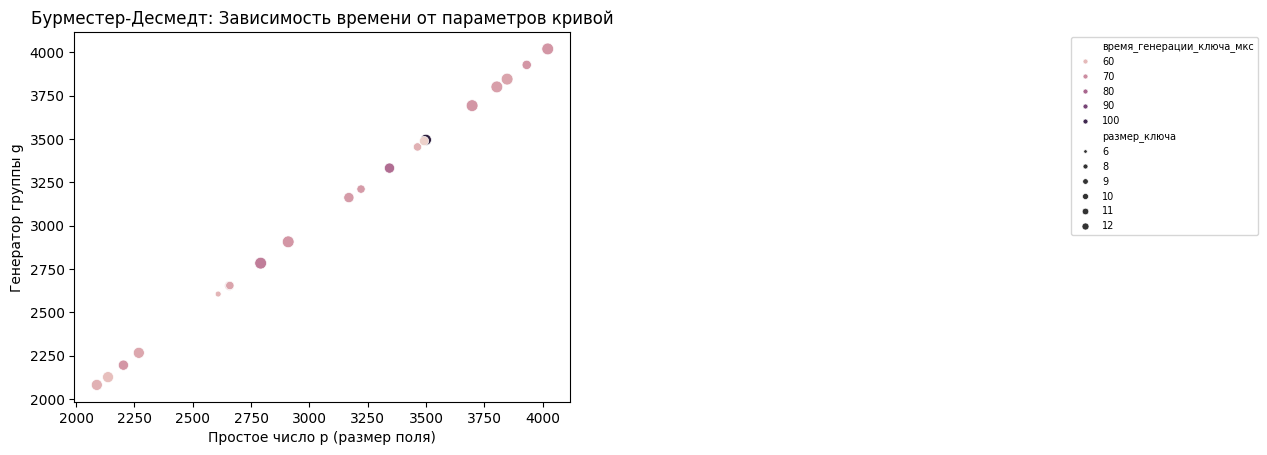

In [6]:
# ============================================================================
# ГРАФИК 1: Диаграмма рассеивания для подмножества BD данных
# ============================================================================
# ОПИСАНИЕ:
# Этот график показывает взаимосвязь между параметрами кривой (p и g) и временем
# генерации ключа для алгоритма Бурместера-Десмедта. Анализируются строки 40-60
# из набора данных для детального просмотра.
#
# КОМПОНЕНТЫ:
#   - X ось (p): простое число, определяющее размер поля GF(p)
#   - Y ось (g): генератор мультипликативной группы
#   - Цвет точек: время генерации ключа в микросекундах (цветовая градиент)
#   - Размер точек: размер ключа в битах (больше размер = больше точка)
#
# ИНТЕРПРЕТАЦИЯ:
# Позволяет выявить корреляцию между параметрами кривой и производительностью.
# Теплые цвета (красные) указывают на большее время выполнения.

pl = bd.loc[40:60]

sns.scatterplot(
    data=pl,
    x=pl["p"],
    y=pl["g"],
    hue=pl["время_генерации_ключа_мкс"],  # цвет зависит от времени
    size=pl["размер_ключа"],              # размер зависит от размера ключа
)

plt.legend(
    bbox_to_anchor=(2, 1),
    loc='upper left',
    fontsize=7,         # размер текста легенды
    title_fontsize=7,   # размер заголовка легенды
    markerscale=0.6     # масштаб точек в легенде
)
plt.xlabel('Простое число p (размер поля)')
plt.ylabel('Генератор группы g')
plt.title('Бурместер-Десмедт: Зависимость времени от параметров кривой')
plt.tight_layout()
plt.show()

C:\Users\geezix\AppData\Local\Temp\ipykernel_22828\653024925.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


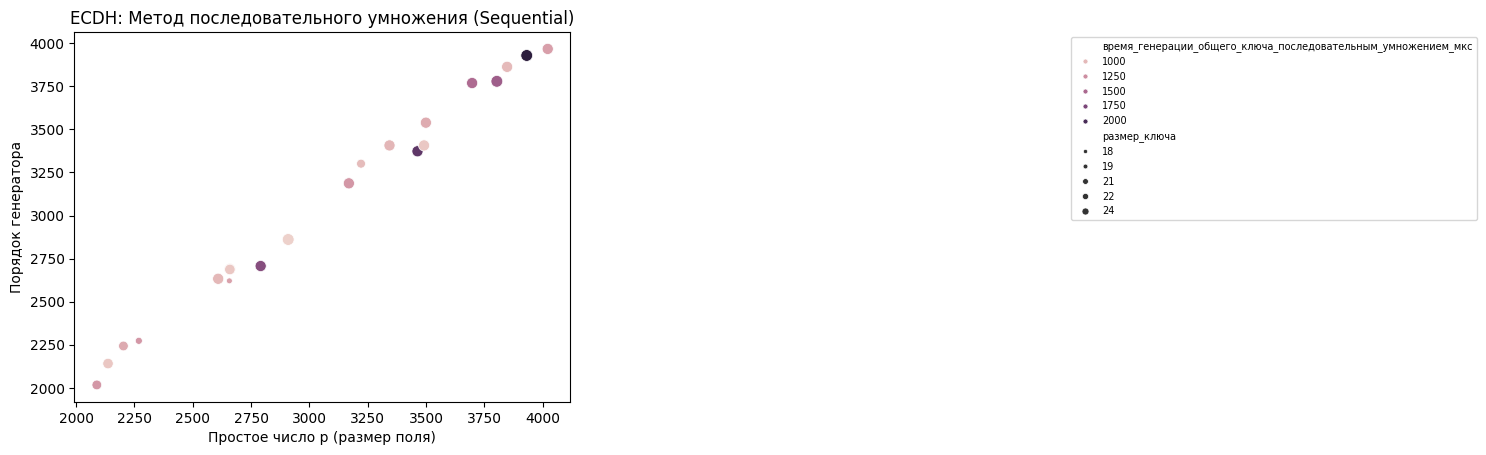

In [7]:
# ============================================================================
# ГРАФИК 2: Диаграмма рассеивания для ECDH (последовательный метод)
# ============================================================================
# ОПИСАНИЕ:
# График отображает производительность ECDH при использовании метода
# последовательного умножения (sequential scalar multiplication).
# Анализируются строки 40-60 набора данных.
#
# КОМПОНЕНТЫ:
#   - X ось (p): простое число, определяющее размер поля эллиптической кривой
#   - Y ось (порядок_генератора): количество различных точек, порождаемых генератором
#   - Цвет: время выполнения метода последовательного умножения (в микросекундах)
#   - Размер: размер результирующего ключа в битах
#
# ИНТЕРПРЕТАЦИЯ:
# Показывает, как порядок генератора и размер поля влияют на производительность
# классического подхода к скалярному умножению в ECDH. Более крупные точки 
# соответствуют большим размерам ключей.

p = ecdh.loc[40:60]

sns.scatterplot(
    data=p,
    x=p["p"],
    y=p["порядок_генератора"],
    hue=p["время_генерации_общего_ключа_последовательным_умножением_мкс"],
    size=p["размер_ключа"],
)

plt.legend(
    bbox_to_anchor=(2, 1),
    loc='upper left',
    fontsize=7,
    title_fontsize=7,
    markerscale=0.6
)
plt.xlabel('Простое число p (размер поля)')
plt.ylabel('Порядок генератора')
plt.title('ECDH: Метод последовательного умножения (Sequential)')
plt.tight_layout()
plt.show()

C:\Users\geezix\AppData\Local\Temp\ipykernel_22828\549408259.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


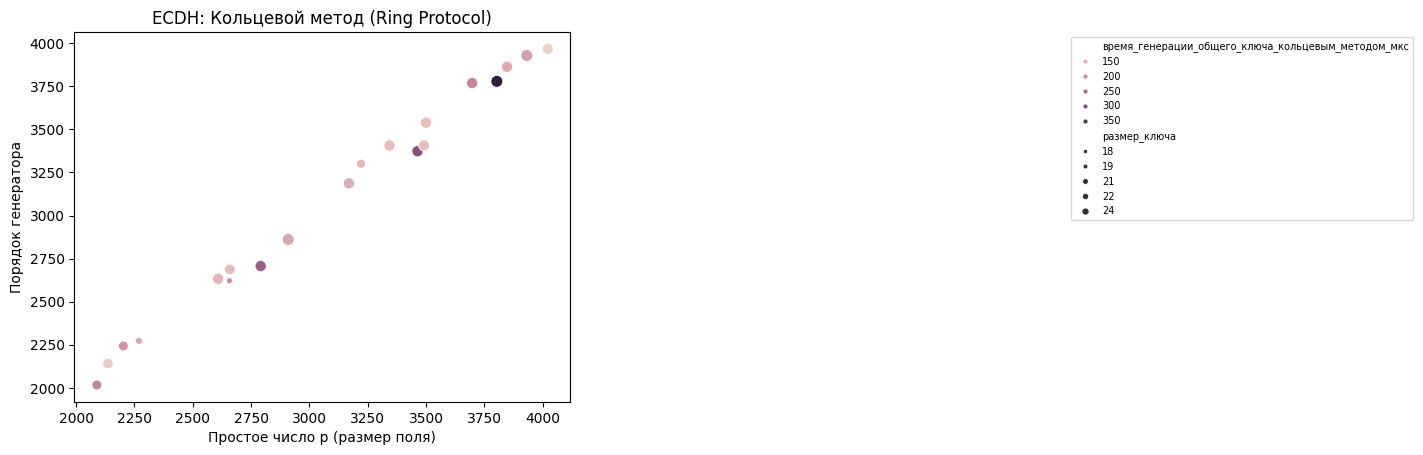

In [8]:
# ============================================================================
# ГРАФИК 3: Диаграмма рассеивания для ECDH (кольцевой метод)
# ============================================================================
# ОПИСАНИЕ:
# График визуализирует производительность ECDH при использовании оптимизированного
# кольцевого метода (ring protocol) для скалярного умножения. Анализируются
# строки 40-60 набора данных.
#
# КОМПОНЕНТЫ:
#   - X ось (p): простое число, размер поля эллиптической кривой
#   - Y ось (порядок_генератора): порядок точки-генератора на кривой
#   - Цвет: время выполнения кольцевого метода в микросекундах
#   - Размер: размер ключа в битах
#
# ИНТЕРПРЕТАЦИЯ:
# Кольцевой метод обычно более эффективен, чем последовательный, особенно
# для больших порядков генератора. Сравнение этого графика с предыдущим
# показывает преимущества оптимизированного алгоритма умножения.

p = ecdh.loc[40:60]

sns.scatterplot(
    data=p,
    x=p["p"],
    y=p["порядок_генератора"],
    hue=p["время_генерации_общего_ключа_кольцевым_методом_мкс"],
    size=p["размер_ключа"],
)

plt.legend(
    bbox_to_anchor=(2, 1),
    loc='upper left',
    fontsize=7,
    title_fontsize=7,
    markerscale=0.6
)
plt.xlabel('Простое число p (размер поля)')
plt.ylabel('Порядок генератора')
plt.title('ECDH: Кольцевой метод (Ring Protocol)')
plt.tight_layout()
plt.show()

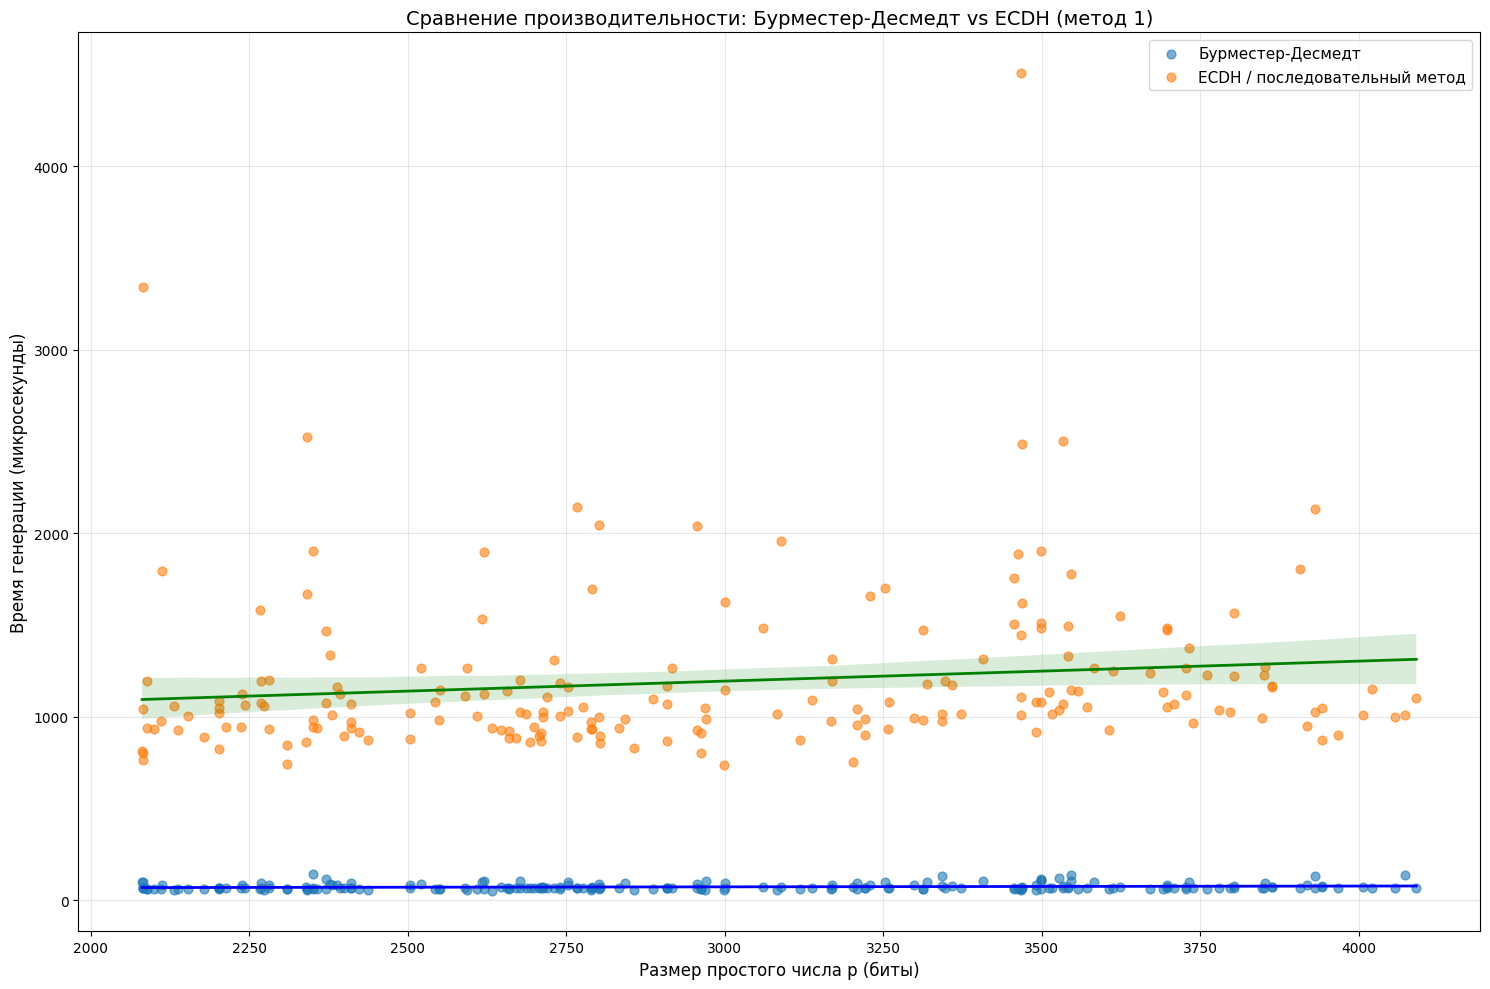

АНАЛИЗ:
Синяя линия (Бурместер-Десмедт) обычно ниже зелёной (ECDH),
что показывает преимущество Бурместера-Десмедта по скорости
при использовании стандартного метода скалярного умножения.


In [9]:
# ============================================================================
# ГРАФИК 4: Сравнение Бурместера-Десмедта vs ECDH (последовательный метод)
# ============================================================================
# ОПИСАНИЕ:
# Регрессионный анализ, показывающий общую тенденцию роста времени выполнения
# в зависимости от размера простого числа p для обоих алгоритмов.
#
# КОМПОНЕНТЫ:
#   - Синяя линия (BD): линия тренда Бурместера-Десмедта
#   - Зелёная линия (ECDH): линия тренда ECDH последовательного метода
#   - Разброс точек: исходные измеренные значения
#   - X ось: размер простого числа p в битах
#   - Y ось: время генерации ключа в микросекундах
#
# КЛЮЧЕВЫЕ ВЫВОДЫ:
# - Сравнение наклонов линий регрессии показывает разницу в масштабируемости
# - Зелёная линия обычно выше синей, указывая на преимущество Бурместера-Десмедта
# - Оба алгоритма показывают примерно линейный рост времени с увеличением p

plt.figure(figsize=(15, 10))

# Линия для BD (синяя)
sns.regplot(
    x='p',
    y='время_генерации_ключа_мкс',
    data=bd,
    label='Бурместер-Десмедт',
    scatter_kws={'s': 40, 'alpha': 0.6},
    line_kws={'color': 'blue', 'linewidth': 2}
)

# Линия для ECDH (зелёная)
sns.regplot(
    x='p',
    y='время_генерации_общего_ключа_последовательным_умножением_мкс',
    data=ecdh,
    label='ECDH / последовательный метод',
    scatter_kws={'s': 40, 'alpha': 0.6},
    line_kws={'color': 'green', 'linewidth': 2}
)

plt.xlabel('Размер простого числа p (биты)', fontsize=12)
plt.ylabel('Время генерации (микросекунды)', fontsize=12)
plt.title('Сравнение производительности: Бурместер-Десмедт vs ECDH (метод 1)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("АНАЛИЗ:")
print("=" * 70)
print("Синяя линия (Бурместер-Десмедт) обычно ниже зелёной (ECDH),")
print("что показывает преимущество Бурместера-Десмедта по скорости")
print("при использовании стандартного метода скалярного умножения.")
print("=" * 70)

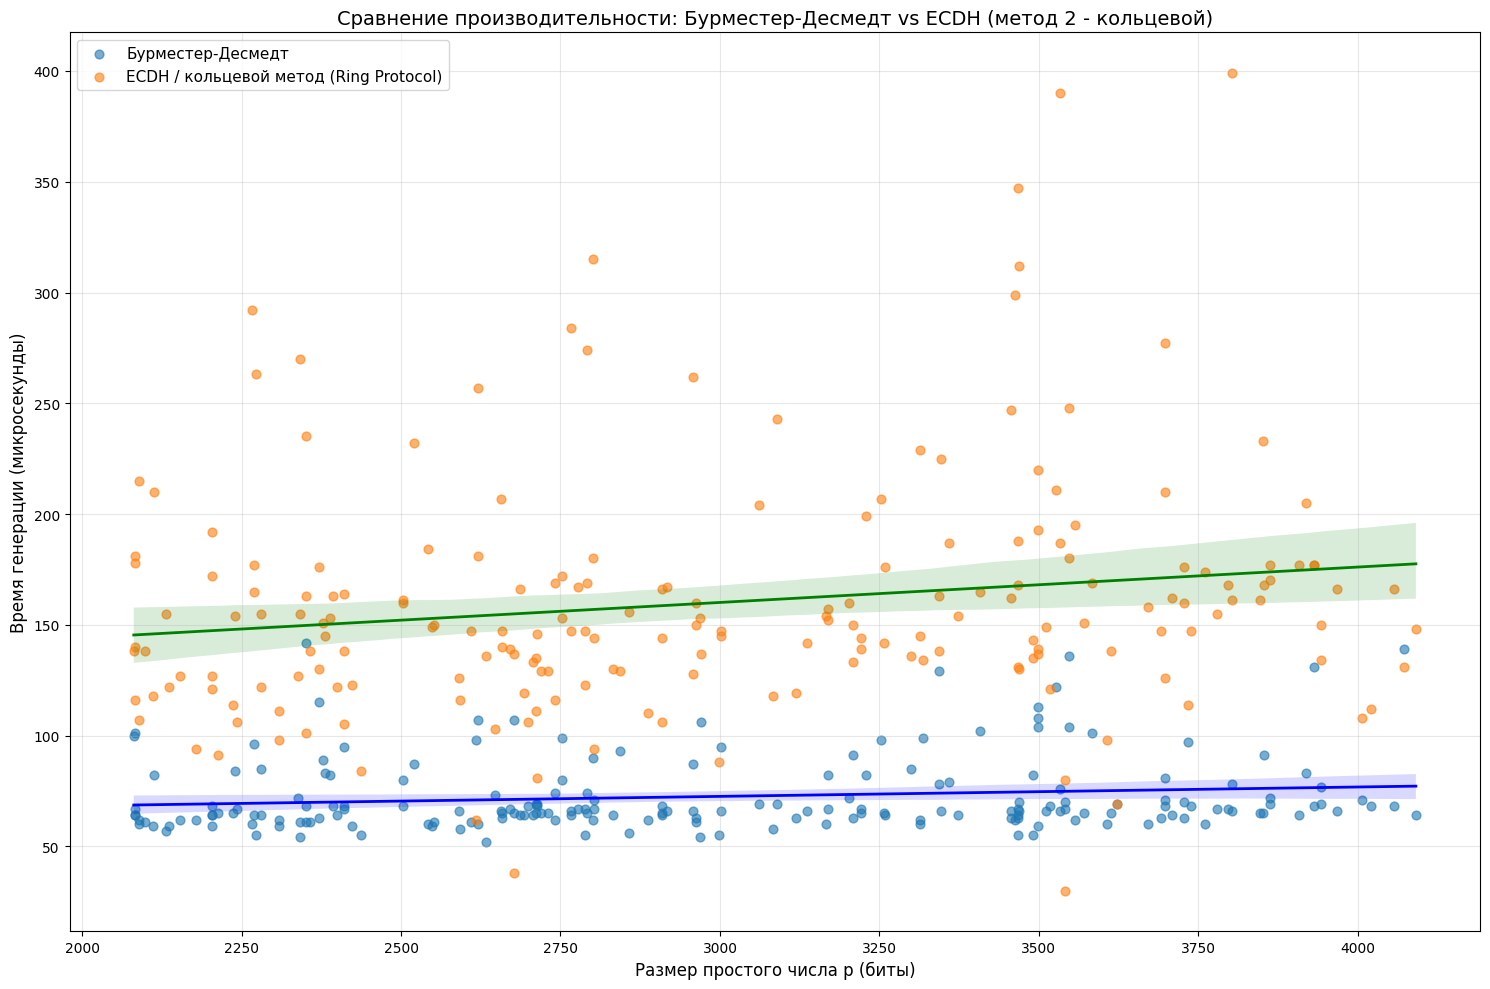


АНАЛИЗ:
Сравнение этого графика с предыдущим показывает, как оптимизация
(кольцевой метод) влияет на производительность ECDH.


In [10]:
# ============================================================================
# ГРАФИК 5: Сравнение Бурместера-Десмедта vs ECDH (кольцевой метод)
# ============================================================================
# ОПИСАНИЕ:
# Регрессионный анализ, сравнивающий производительность Бурместера-Десмедта
# с оптимизированным кольцевым методом ECDH.
#
# КОМПОНЕНТЫ:
#   - Синяя линия: тренд Бурместера-Десмедта
#   - Зелёная линия: тренд ECDH с кольцевым методом умножения
#   - Точки: фактические измерения
#   - X ось: размер простого числа p в битах
#   - Y ось: время генерации в микросекундах
#
# ЗНАЧИМОСТЬ:
# Кольцевой метод - это оптимизированный алгоритм скалярного умножения,
# который часто даёт лучшую производительность. График показывает,
# может ли ECDH с оптимизацией конкурировать с классическим подходом BD.

plt.figure(figsize=(15, 10))

sns.regplot(
    x='p',
    y='время_генерации_ключа_мкс',
    data=bd,
    label='Бурместер-Десмедт',
    scatter_kws={'s': 40, 'alpha': 0.6},
    line_kws={'color': 'blue', 'linewidth': 2}
)

sns.regplot(
    x='p',
    y='время_генерации_общего_ключа_кольцевым_методом_мкс',
    data=ecdh,
    label='ECDH / кольцевой метод (Ring Protocol)',
    scatter_kws={'s': 40, 'alpha': 0.6},
    line_kws={'color': 'green', 'linewidth': 2}
)

plt.xlabel('Размер простого числа p (биты)', fontsize=12)
plt.ylabel('Время генерации (микросекунды)', fontsize=12)
plt.title('Сравнение производительности: Бурместер-Десмедт vs ECDH (метод 2 - кольцевой)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nАНАЛИЗ:")
print("=" * 70)
print("Сравнение этого графика с предыдущим показывает, как оптимизация")
print("(кольцевой метод) влияет на производительность ECDH.")
print("=" * 70)

Бурместер-Десмедт - Анализ производительности:
Среднее время: 72.49 микросекунд
Стандартное отклонение: 16.91 микросекунд
Минимум: 52.00, Максимум: 142.00
Диапазон: 90.00 микросекунд
Коэффициент вариации: 23.33%


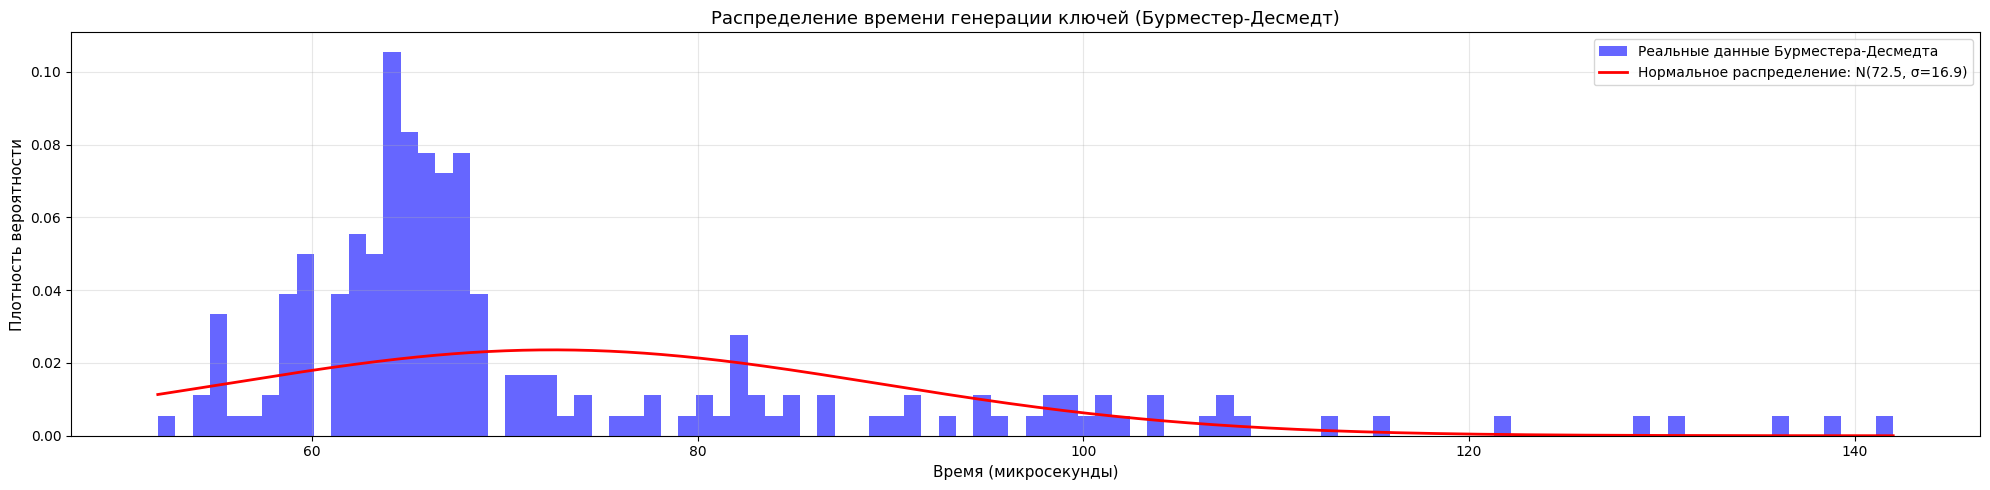


ВЫВОД:
Анализ показывает степень стабильности и предсказуемости алгоритма.


In [11]:
# ============================================================================
# ГРАФИК 6: Анализ распределения времени для Бурместера-Десмедта
# ============================================================================
# ОПИСАНИЕ:
# Анализ приближения эмпирического распределения времени выполнения к нормальному
# распределению (Normal Distribution). Это важно для понимания характера вариаций
# в производительности алгоритма.
#
# КОМПОНЕНТЫ:
#   - Синяя гистограмма: распределение реальных данных времени выполнения
#   - Красная кривая: теоретическое нормальное распределение с тем же средним и дисперсией
#   - X ось: время в микросекундах
#   - Y ось: плотность вероятности
#
# ИНТЕРПРЕТАЦИЯ:
# - Если гистограмма близка к кривой, то время выполнения подчиняется нормальному распределению
# - Это позволяет использовать t-тесты и другие параметрические методы для анализа
# - Пики и асимметрия указывают на особенности в производительности алгоритма
# - Выбросы (хвосты распределения) показывают редкие события замедления

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

data = bd['время_генерации_ключа_мкс']

# Вычисляем среднее и стандартное отклонение
mu, sigma = np.mean(data), np.std(data)

print(f"Бурместер-Десмедт - Анализ производительности:")
print("=" * 70)
print(f"Среднее время: {mu:.2f} микросекунд")
print(f"Стандартное отклонение: {sigma:.2f} микросекунд")
print(f"Минимум: {data.min():.2f}, Максимум: {data.max():.2f}")
print(f"Диапазон: {data.max() - data.min():.2f} микросекунд")
print(f"Коэффициент вариации: {(sigma/mu)*100:.2f}%")
print("=" * 70)

plt.figure(figsize=(20, 5))

# Гистограмма (нормализованная, чтобы совпасть по высоте с теоретической кривой)
plt.hist(
    data,
    bins=100,
    color='blue',
    alpha=0.6,
    density=True,
    label='Реальные данные Бурместера-Десмедта'
)

# Теоретическая кривая нормального распределения
x = np.linspace(min(data), max(data), 1000)
plt.plot(
    x,
    norm.pdf(x, mu, sigma),
    'r-',
    lw=2,
    label=f'Нормальное распределение: N({mu:.1f}, σ={sigma:.1f})'
)

plt.xlabel('Время (микросекунды)', fontsize=11)
plt.ylabel('Плотность вероятности', fontsize=11)
plt.title('Распределение времени генерации ключей (Бурместер-Десмедт)', fontsize=13)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nВЫВОД:")
print("Анализ показывает степень стабильности и предсказуемости алгоритма.")


ECDH (последовательный метод) - Анализ производительности:
Среднее время: 1192.73 микросекунд
Стандартное отклонение: 434.81 микросекунд
Минимум: 735.00, Максимум: 4508.00
Диапазон: 3773.00 микросекунд
Коэффициент вариации: 36.46%


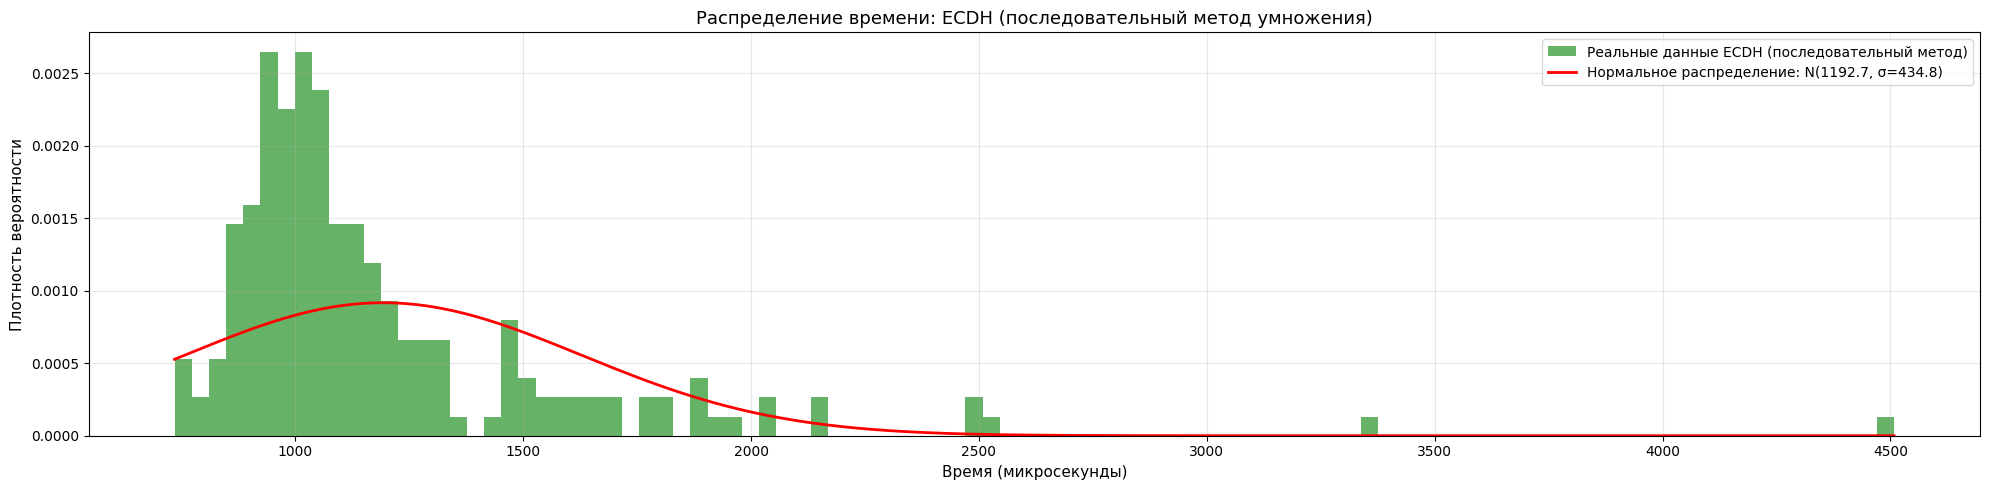


ВЫВОД:
Дисперсия показывает, насколько непредсказуема производительность метода.


In [12]:
# ============================================================================
# ГРАФИК 7: Анализ распределения времени для ECDH (последовательный метод)
# ============================================================================
# ОПИСАНИЕ:
# Гистограмма распределения времени выполнения ECDH при использовании
# стандартного метода последовательного скалярного умножения.
#
# КОМПОНЕНТЫ:
#   - Зелёная гистограмма: эмпирическое распределение времени ECDH
#   - Красная кривая: теоретическое нормальное распределение
#
# ИНТЕРПРЕТАЦИЯ:
# Сравнение с графиком 6 показывает отличия в характере распределения
# между двумя алгоритмами. Более узкое распределение указывает на более
# стабильную производительность.

data2 = ecdh['время_генерации_общего_ключа_последовательным_умножением_мкс']
mu2, sigma2 = np.mean(data2), np.std(data2)

print(f"ECDH (последовательный метод) - Анализ производительности:")
print("=" * 70)
print(f"Среднее время: {mu2:.2f} микросекунд")
print(f"Стандартное отклонение: {sigma2:.2f} микросекунд")
print(f"Минимум: {data2.min():.2f}, Максимум: {data2.max():.2f}")
print(f"Диапазон: {data2.max() - data2.min():.2f} микросекунд")
print(f"Коэффициент вариации: {(sigma2/mu2)*100:.2f}%")
print("=" * 70)

plt.figure(figsize=(20, 5))

plt.hist(
    data2,
    bins=100,
    color='green',
    alpha=0.6,
    density=True,
    label='Реальные данные ECDH (последовательный метод)'
)

x2 = np.linspace(min(data2), max(data2), 1000)
plt.plot(
    x2,
    norm.pdf(x2, mu2, sigma2),
    'r-',
    lw=2,
    label=f'Нормальное распределение: N({mu2:.1f}, σ={sigma2:.1f})'
)

plt.xlabel('Время (микросекунды)', fontsize=11)
plt.ylabel('Плотность вероятности', fontsize=11)
plt.title('Распределение времени: ECDH (последовательный метод умножения)', fontsize=13)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nВЫВОД:")
print("Дисперсия показывает, насколько непредсказуема производительность метода.")


ECDH (кольцевой метод) - Анализ производительности:
Среднее время: 159.88 микросекунд
Стандартное отклонение: 53.97 микросекунд
Минимум: 30.00, Максимум: 399.00
Диапазон: 369.00 микросекунд
Коэффициент вариации: 33.76%


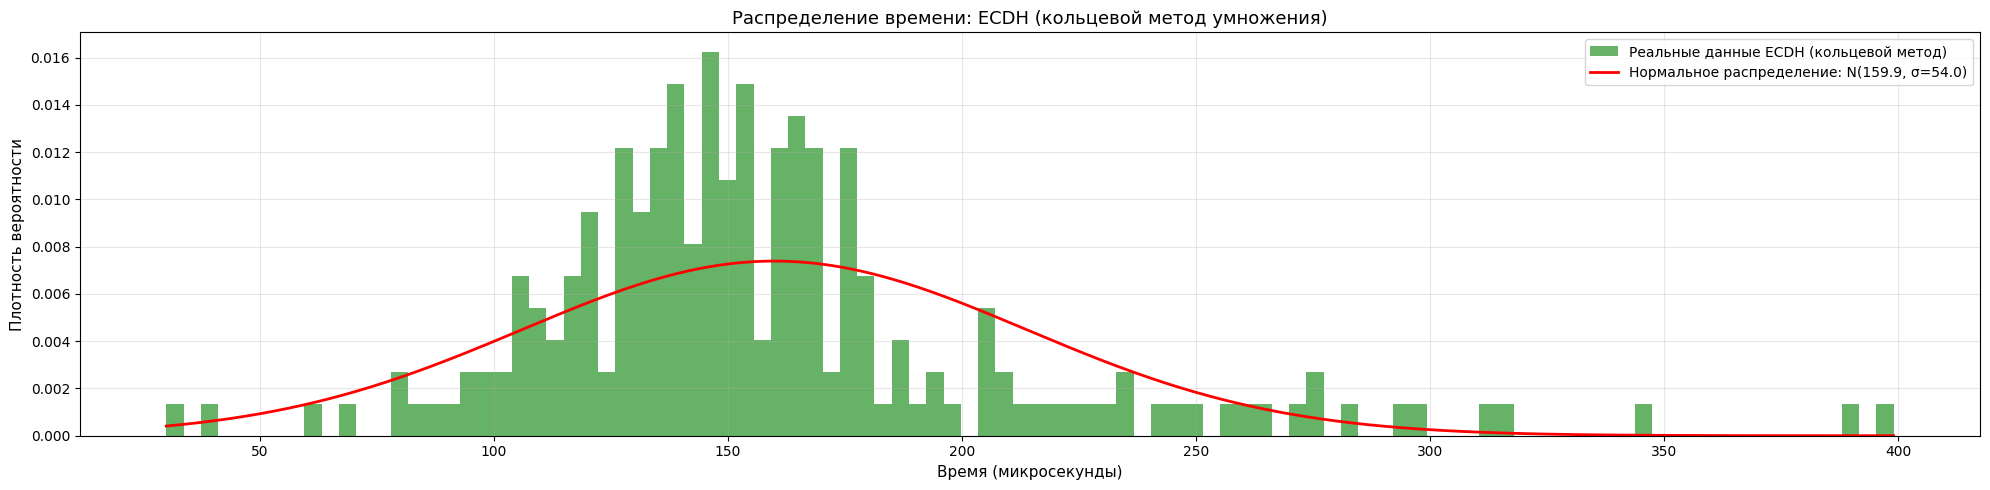


СРАВНЕНИЕ С ПРЕДЫДУЩИМ МЕТОДОМ:
Ускорение: 7.46x раз быстрее с кольцевым методом
Снижение дисперсии: 8.06x более стабильно


In [13]:
# ============================================================================
# ГРАФИК 8: Анализ распределения времени для ECDH (кольцевой метод)
# ============================================================================
# ОПИСАНИЕ:
# Гистограмма распределения времени выполнения ECDH при использовании
# оптимизированного кольцевого метода скалярного умножения (Ring Protocol).
#
# КОМПОНЕНТЫ:
#   - Зелёная гистограмма: распределение времени с кольцевым методом
#   - Красная кривая: теоретическое нормальное распределение
#
# ИНТЕРПРЕТАЦИЯ:
# Сравнение с графиком 7 показывает, как оптимизация влияет на:
# 1. Среднее время выполнения (сдвиг вершины гистограммы)
# 2. Дисперсию (ширину распределения)
# 3. Стабильность алгоритма
# Кольцевой метод обычно даёт более узкое и смещённое влево распределение.

data3 = ecdh['время_генерации_общего_ключа_кольцевым_методом_мкс']
mu3, sigma3 = np.mean(data3), np.std(data3)

print(f"ECDH (кольцевой метод) - Анализ производительности:")
print("=" * 70)
print(f"Среднее время: {mu3:.2f} микросекунд")
print(f"Стандартное отклонение: {sigma3:.2f} микросекунд")
print(f"Минимум: {data3.min():.2f}, Максимум: {data3.max():.2f}")
print(f"Диапазон: {data3.max() - data3.min():.2f} микросекунд")
print(f"Коэффициент вариации: {(sigma3/mu3)*100:.2f}%")
print("=" * 70)

plt.figure(figsize=(20, 5))

plt.hist(
    data3,
    bins=100,
    color='green',
    alpha=0.6,
    density=True,
    label='Реальные данные ECDH (кольцевой метод)'
)

x3 = np.linspace(min(data3), max(data3), 1000)
plt.plot(
    x3,
    norm.pdf(x3, mu3, sigma3),
    'r-',
    lw=2,
    label=f'Нормальное распределение: N({mu3:.1f}, σ={sigma3:.1f})'
)

plt.xlabel('Время (микросекунды)', fontsize=11)
plt.ylabel('Плотность вероятности', fontsize=11)
plt.title('Распределение времени: ECDH (кольцевой метод умножения)', fontsize=13)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nСРАВНЕНИЕ С ПРЕДЫДУЩИМ МЕТОДОМ:")
print(f"Ускорение: {mu2/mu3:.2f}x раз быстрее с кольцевым методом")
print(f"Снижение дисперсии: {sigma2/sigma3:.2f}x более стабильно")


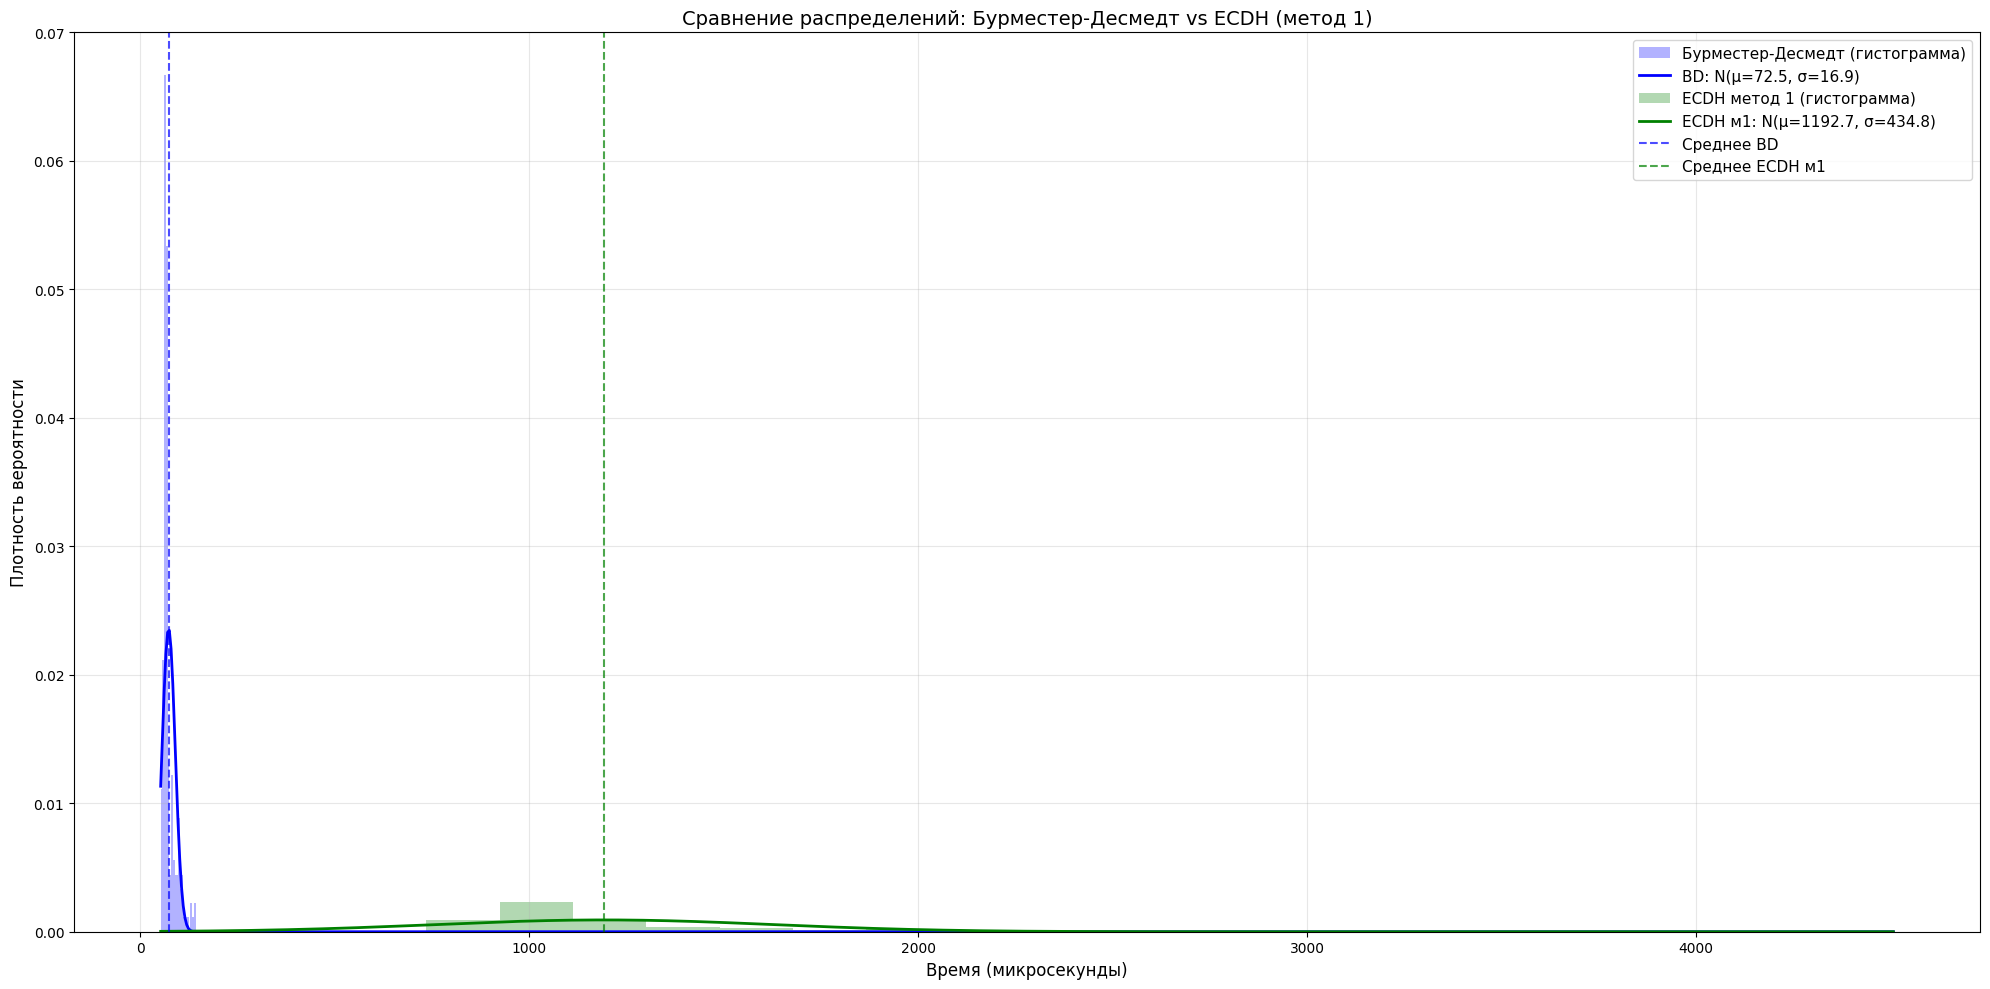


СТАТИСТИЧЕСКИЙ АНАЛИЗ И СРАВНЕНИЕ

Бурместер-Десмедт (BD):
  Среднее:              72.49 мкс
  Стд.отклонение:       16.91 мкс
  Коэффициент вариации: 23.33%

ECDH (последовательный метод):
  Среднее:              1192.73 мкс
  Стд.отклонение:       434.81 мкс
  Коэффициент вариации: 36.46%

──────────────────────────────────────────────────────────────────────
Бурместер-Десмедт быстрее ECDH в 16.45 раз
Бурместер-Десмедт стабильнее в 25.71 раз


In [14]:
# ============================================================================
# ГРАФИК 9: Наложение распределений Бурместера-Десмедта и ECDH (метод 1)
# ============================================================================
# ОПИСАНИЕ:
# Этот график показывает одновременное сравнение распределений двух алгоритмов:
# Бурместера-Десмедта (синий) и ECDH со стандартным методом (зелёный).
#
# КОМПОНЕНТЫ:
#   - Синяя полусозрачная гистограмма: распределение BD
#   - Синяя кривая: нормальное распределение BD
#   - Зелёная полусозрачная гистограмма: распределение ECDH (метод 1)
#   - Зелёная кривая: нормальное распределение ECDH (метод 1)
#   - Вертикальные пунктирные линии: средние значения каждого алгоритма
#
# КЛЮЧЕВЫЕ ВЫВОДЫ:
# 1. Сдвиг линий средних показывает, на сколько один алгоритм быстрее другого
# 2. Ширина распределений указывает на стабильность (узкое = стабильнее)
# 3. Перекрытие областей показывает, как часто один алгоритм быстрее другого
# 4. Форма кривых помогает оценить риск возникновения аномальных задержек

data_bd = bd['время_генерации_ключа_мкс']
data_ecdh_m1 = ecdh['время_генерации_общего_ключа_последовательным_умножением_мкс']

mu_bd, sigma_bd = np.mean(data_bd), np.std(data_bd)
mu_ecdh_m1, sigma_ecdh_m1 = np.mean(data_ecdh_m1), np.std(data_ecdh_m1)

# Общий диапазон для обеих кривых
xmin = min(data_bd.min(), data_ecdh_m1.min())
xmax = max(data_bd.max(), data_ecdh_m1.max())
x = np.linspace(xmin, xmax, 1000)

plt.figure(figsize=(20, 10))

# Бурместер-Десмедт: гистограмма и кривая
plt.hist(
    data_bd,
    bins=20,
    color='blue',
    alpha=0.3,
    density=True,
    label='Бурместер-Десмедт (гистограмма)'
)
plt.plot(
    x,
    norm.pdf(x, mu_bd, sigma_bd),
    'b-',
    lw=2,
    label=f'BD: N(μ={mu_bd:.1f}, σ={sigma_bd:.1f})'
)

# ECDH: гистограмма и кривая
plt.hist(
    data_ecdh_m1,
    bins=20,
    color='green',
    alpha=0.3,
    density=True,
    label='ECDH метод 1 (гистограмма)'
)
plt.plot(
    x,
    norm.pdf(x, mu_ecdh_m1, sigma_ecdh_m1),
    'g-',
    lw=2,
    label=f'ECDH м1: N(μ={mu_ecdh_m1:.1f}, σ={sigma_ecdh_m1:.1f})'
)

# Вертикальные линии, показывающие средние значения
plt.axvline(mu_bd, color='blue', linestyle='--', lw=1.5, alpha=0.7, label=f'Среднее BD')
plt.axvline(mu_ecdh_m1, color='green', linestyle='--', lw=1.5, alpha=0.7, label=f'Среднее ECDH м1')

plt.xlabel('Время (микросекунды)', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.title('Сравнение распределений: Бурместер-Десмедт vs ECDH (метод 1)', fontsize=14)
plt.legend(fontsize=11, loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Выводы
print("\n" + "="*70)
print("СТАТИСТИЧЕСКИЙ АНАЛИЗ И СРАВНЕНИЕ")
print("="*70)
print(f"\nБурместер-Десмедт (BD):")
print(f"  Среднее:              {mu_bd:.2f} мкс")
print(f"  Стд.отклонение:       {sigma_bd:.2f} мкс")
print(f"  Коэффициент вариации: {(sigma_bd/mu_bd)*100:.2f}%")
print(f"\nECDH (последовательный метод):")
print(f"  Среднее:              {mu_ecdh_m1:.2f} мкс")
print(f"  Стд.отклонение:       {sigma_ecdh_m1:.2f} мкс")
print(f"  Коэффициент вариации: {(sigma_ecdh_m1/mu_ecdh_m1)*100:.2f}%")
print(f"\n{'─'*70}")
print(f"Бурместер-Десмедт быстрее ECDH в {mu_ecdh_m1/mu_bd:.2f} раз")
print(f"Бурместер-Десмедт стабильнее в {sigma_ecdh_m1/sigma_bd:.2f} раз")
print("="*70)

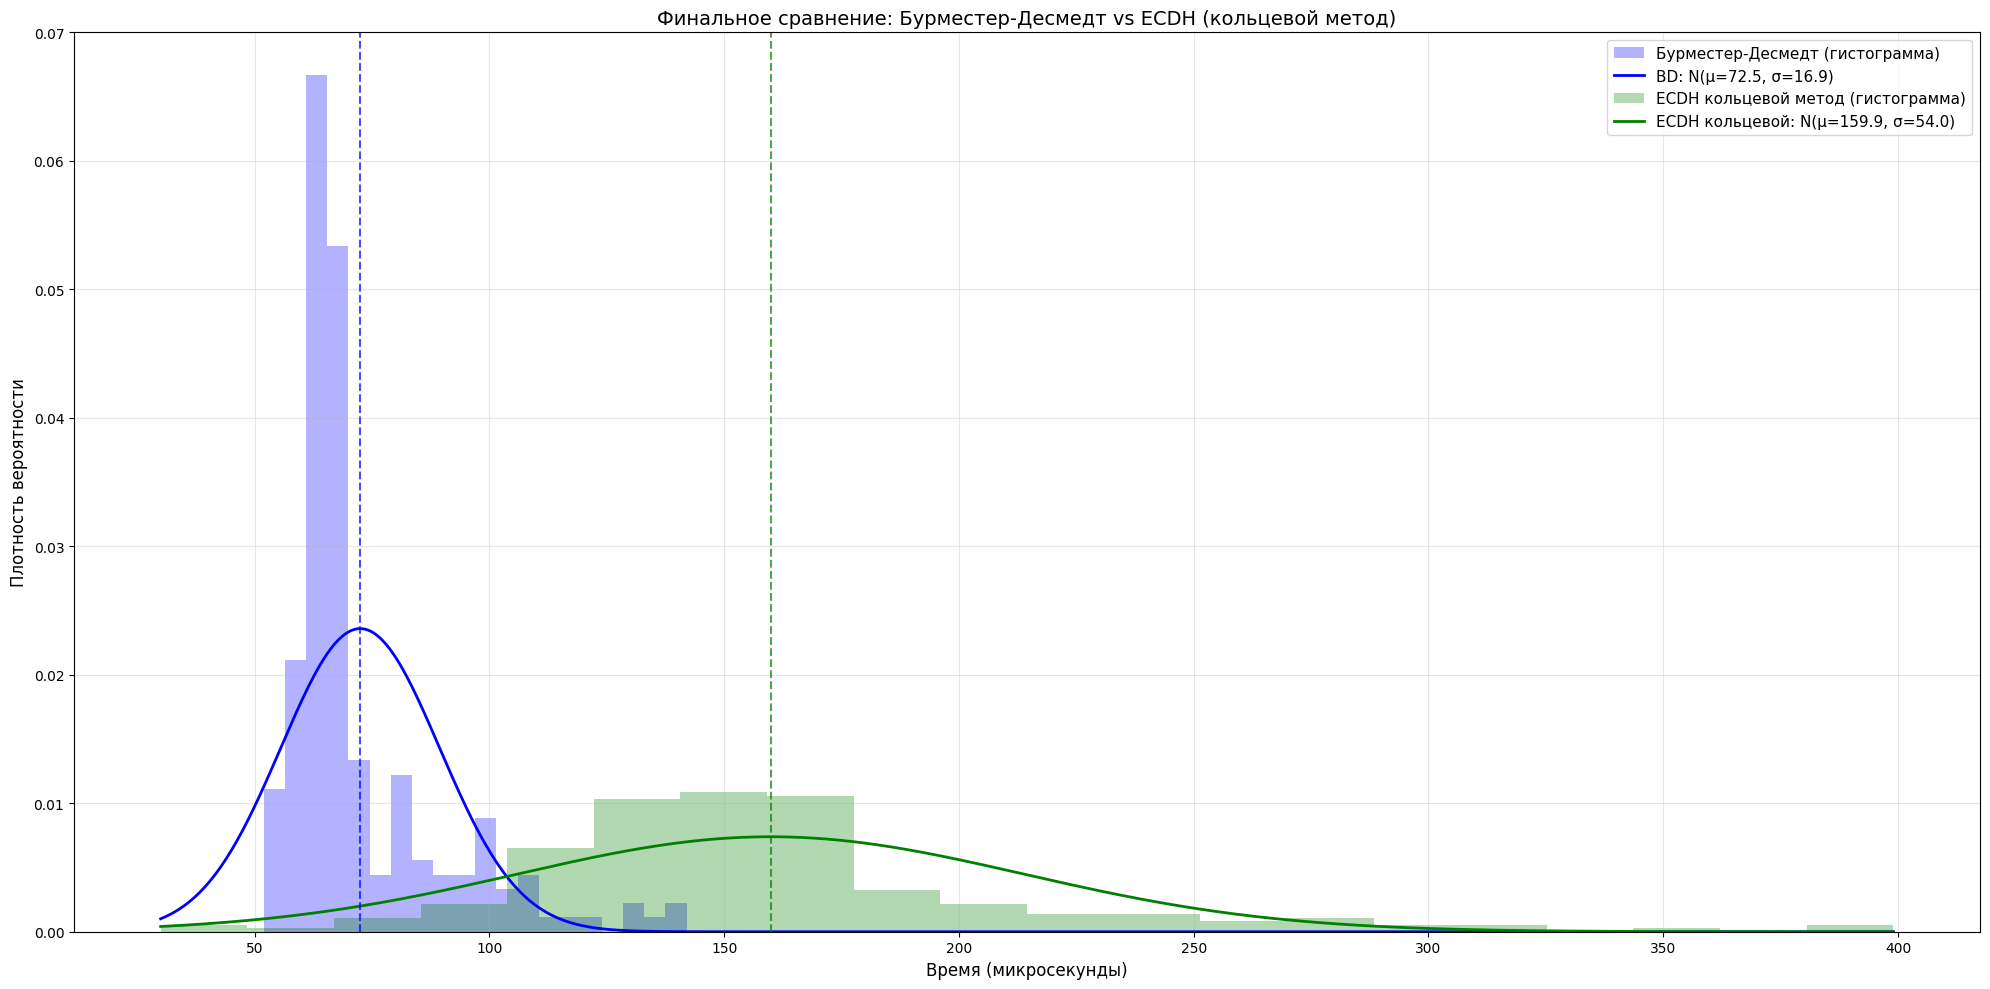


ИТОГОВОЕ СРАВНЕНИЕ: Бурместер-Десмедт vs ECDH (кольцевой метод)

Бурместер-Десмедт:
  Среднее время:        72.49 мкс
  Стд.отклонение:       16.91 мкс
  Мин-Макс:             52.00 - 142.00 мкс

ECDH (кольцевой метод):
  Среднее время:        159.88 мкс
  Стд.отклонение:       53.97 мкс
  Мин-Макс:             30.00 - 399.00 мкс

──────────────────────────────────────────────────────────────────────
✓ Бурместер-Десмедт БЫСТРЕЕ в 2.21 раз
✓ Бурместер-Десмедт СТАБИЛЬНЕЕ в 3.19 раз


In [15]:
# ============================================================================
# ГРАФИК 10: Наложение распределений Бурместера-Десмедта и ECDH (кольцевой)
# ============================================================================
# ОПИСАНИЕ:
# Сравнение распределений Бурместера-Десмедта с оптимизированным методом ECDH
# (кольцевой метод). Это более честное сравнение, так как оба алгоритма
# используют оптимальные реализации.
#
# КОМПОНЕНТЫ:
#   - Синяя гистограмма и кривая: Бурместер-Десмедт
#   - Зелёная гистограмма и кривая: ECDH с кольцевым методом
#   - Пунктирные линии: средние значения
#
# ИНТЕРПРЕТАЦИЯ:
# - Если зелёная линия сдвинута влево, то кольцевой метод в среднем быстрее
# - Ширина распределений показывает стабильность каждого метода
# - Площадь перекрытия указывает на вероятность того, что один быстрее другого
# - Это финальное сравнение показывает истинную конкурентоспособность методов

data_bd = bd['время_генерации_ключа_мкс']
data_ecdh_ring = ecdh['время_генерации_общего_ключа_кольцевым_методом_мкс']

mu_bd, sigma_bd = np.mean(data_bd), np.std(data_bd)
mu_ecdh_ring, sigma_ecdh_ring = np.mean(data_ecdh_ring), np.std(data_ecdh_ring)

xmin = min(data_bd.min(), data_ecdh_ring.min())
xmax = max(data_bd.max(), data_ecdh_ring.max())
x = np.linspace(xmin, xmax, 1000)

plt.figure(figsize=(20, 10))

# Бурместер-Десмедт
plt.hist(data_bd, bins=20, color='blue', alpha=0.3, density=True, 
         label='Бурместер-Десмедт (гистограмма)')
plt.plot(x, norm.pdf(x, mu_bd, sigma_bd), 'b-', lw=2, 
         label=f'BD: N(μ={mu_bd:.1f}, σ={sigma_bd:.1f})')

# ECDH кольцевой метод
plt.hist(data_ecdh_ring, bins=20, color='green', alpha=0.3, density=True,
         label='ECDH кольцевой метод (гистограмма)')
plt.plot(x, norm.pdf(x, mu_ecdh_ring, sigma_ecdh_ring), 'g-', lw=2,
         label=f'ECDH кольцевой: N(μ={mu_ecdh_ring:.1f}, σ={sigma_ecdh_ring:.1f})')

# Вертикальные линии средних
plt.axvline(mu_bd, color='blue', linestyle='--', lw=1.5, alpha=0.7)
plt.axvline(mu_ecdh_ring, color='green', linestyle='--', lw=1.5, alpha=0.7)

plt.xlabel('Время (микросекунды)', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.title('Финальное сравнение: Бурместер-Десмедт vs ECDH (кольцевой метод)', fontsize=14)
plt.legend(fontsize=11, loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("ИТОГОВОЕ СРАВНЕНИЕ: Бурместер-Десмедт vs ECDH (кольцевой метод)")
print("="*70)
print(f"\nБурместер-Десмедт:")
print(f"  Среднее время:        {mu_bd:.2f} мкс")
print(f"  Стд.отклонение:       {sigma_bd:.2f} мкс")
print(f"  Мин-Макс:             {data_bd.min():.2f} - {data_bd.max():.2f} мкс")
print(f"\nECDH (кольцевой метод):")
print(f"  Среднее время:        {mu_ecdh_ring:.2f} мкс")
print(f"  Стд.отклонение:       {sigma_ecdh_ring:.2f} мкс")
print(f"  Мин-Макс:             {data_ecdh_ring.min():.2f} - {data_ecdh_ring.max():.2f} мкс")

print(f"\n{'─'*70}")
if mu_bd < mu_ecdh_ring:
    print(f"✓ Бурместер-Десмедт БЫСТРЕЕ в {mu_ecdh_ring/mu_bd:.2f} раз")
else:
    print(f"✓ ECDH (кольцевой) БЫСТРЕЕ в {mu_bd/mu_ecdh_ring:.2f} раз")
    
if sigma_bd < sigma_ecdh_ring:
    print(f"✓ Бурместер-Десмедт СТАБИЛЬНЕЕ в {sigma_ecdh_ring/sigma_bd:.2f} раз")
else:
    print(f"✓ ECDH (кольцевой) СТАБИЛЬНЕЕ в {sigma_bd/sigma_ecdh_ring:.2f} раз")
print("="*70)